# Predictive Model to predict the prices of used cars

### Objective :
To suggest the optimal selling price of used cars to customers in order to help the seller sell faster and get better value. 

### Solution : 
Prepare a model to predict the selling price of the car based on the available features.

## I. Import libraries and modules

In [1]:
import os
import pandas as pd
import numpy as np
import re

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## II. Import Train and Test data

In [2]:
# Train Data
train = pd.read_csv("C:\\Users\\Roma\\Downloads\\Retail & Ecommerce Analytics\\train-data.csv")
# Test Data
test = pd.read_csv("C:\\Users\\Roma\\Downloads\\Retail & Ecommerce Analytics\\test-data.csv")

In [3]:
train.head()

,Id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test.head()

,Id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
# rows & columns in Train and Test
train.shape, test.shape

((6019, 14), (1234, 13))

#### Descriptive Statistics

In [6]:
train.describe()

,Id,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
test.describe()

,Id,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


## III. Data Pre-processing and Feature Engineering

In [8]:
# CATEGORICAL & NUMERICAL FEATURES

categorical_features = train.select_dtypes(include=[np.object])
categorical_features.head(5)
print("Categorical Features in Train Set:", categorical_features.shape[1])
print(categorical_features.columns)

numerical_features = train.select_dtypes(include=[np.number])
numerical_features.head(5)
print("Numerical Features in Train Set:", numerical_features.shape[1])
print(numerical_features.columns)

Categorical Features in Train Set: 9
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')
Numerical Features in Train Set: 5
Index(['Id', 'Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')


# Missing Values

In [9]:
train.isnull().sum()

Id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
train.isna().sum()/train.shape[0]*100

Id                    0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [11]:
# TRAIN DATA
Percentage_missing = (train.isnull().sum() / len(train)) * 100
missing = pd.DataFrame({"percentage":Percentage_missing, 'count':train.isnull().sum()}).sort_values(by="percentage", ascending=False)
missing.loc[missing['percentage'] > 0]

,percentage,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


86% of the total records are missing for the variable "New_Price".

"Mileage", "Engine" , "Power" , "Seats" have very few records missing. 

In [12]:
# TEST DATA
Percentage_missing = (test.isnull().sum() / len(test)) * 100
missing = pd.DataFrame({"percentage":Percentage_missing, 'count':test.isnull().sum()}).sort_values(by="percentage", ascending=False)
missing.loc[missing['percentage'] > 0]

,percentage,count
New_Price,85.251216,1052
Seats,0.891410,11
Engine,0.810373,10
Power,0.810373,10


# Treatment of Missing values

### i. Missing values in Mileage, Engine, Power

The "Mileage" column had "km/kg" and "kmpl" as its units. "Engine" column had "CC" in its units. "Power" column had "bhp" in its units. So, these units need to be removed from the records to present the data in numeric form for our algorithms to understand.

In [13]:
# removal of units for Train
train['Mileage'] = train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
train['Engine'] = train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
train['Power'] = train['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

# removal of units for Test
test['Mileage'] = test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
test['Engine'] = test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
test['Power'] = test['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

In [14]:
# changing the data type from object to numeric for Train
train['Mileage'] = pd.to_numeric(train['Mileage'], errors='coerce')
train['Engine'] = pd.to_numeric(train['Engine'], errors='coerce')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce')

# changing the data type from object to numeric for Test
test['Mileage'] = pd.to_numeric(test['Mileage'], errors='coerce')
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

#### Feature Engineering : The missing values were treated using Imputation by mean. 

Mean imputation consists of replacing all the occurrences of missing values (NA) within a variable by the mean.

In [15]:
#  MEAN IMPUTATION for Train
train['Engine']=train['Engine'].fillna(train['Engine'].mean())
train['Power']=train['Power'].fillna(train['Power'].mean())
train['Mileage']=train['Mileage'].fillna(train['Mileage'].mean())

#  MEAN IMPUTATION for Test
test['Engine']=test['Engine'].fillna(test['Engine'].mean())
test['Power']=test['Power'].fillna(test['Power'].mean())

### ii. Missing values in Seats

Median Imputation was considered for treating the missing values in Seats.

In [16]:
# Train
train['Seats']=train['Seats'].fillna(train['Seats'].median())

# Test
test['Seats']=test['Seats'].fillna(test['Seats'].median())

#### As the variable "New price" had more than 85% of the records missing so, we had considered of dropping off the particular variable at a later stage.

# Feature Engineering

#### Year 
The variable "Year" was used to create a new column called "Years_driven" for both the Train as well as Test data which gave us the number of years that particular car has been in use.

For this, the column was converted into DateTime format and then was subtracted from the present day.

In [17]:
# new column "Years_driven" using "Year"

now = datetime.datetime.now()
train['Years_driven'] = train['Year'].apply(lambda x : now.year - x)
test['Years_driven'] = test['Year'].apply(lambda x : now.year - x)

#### Name

Two new columns "Brand" and "Model_name" were created using the existing column "Name". 

"Brand" gives us an idea about the Brand of the car or we can say the company manufacturer.

"Model_name" gives the model names of the car

#### Column "Brand"

In [18]:
# Brand : Train data
part =train['Name'].str.partition()
train['Brand'] = part[0]

# Brand : Test data
part =test['Name'].str.partition()
test['Brand'] = part[0]

#### Column "Model_name"

In [19]:
# Model_name : Train data
part =train['Name'].str.partition()
train['Model_name'] = part[2]

# Model_name : Test data
part =test['Name'].str.partition()
test['Model_name'] = part[2]

In [20]:
train.Brand.nunique(), test.Brand.nunique()

(31, 29)

In [21]:
train.Model_name.nunique(), test.Model_name.nunique()

(1876, 768)

### There were 31 unique Brands of car in the Training set and 29 unique Brands in the Testing set. Training set had 1876 models of cars and the Test set had 768 models.

# IV. Exploratory Data Analysis

## Univariate Analysis

## i.  "Brand"

Given below are the counts of different brands of car present in the Training and testing set.

In [22]:
train['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Smart               1
Lamborghini         1
Isuzu               1
Ambassador          1
Name: Brand, dtype: int64

In [23]:
test['Brand'].value_counts()

Maruti           233
Hyundai          233
Honda            135
Toyota            96
Mercedes-Benz     62
Mahindra          59
Volkswagen        59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Volvo              7
Land               7
Mini               5
Datsun             4
Jeep               4
OpelCorsa          1
Bentley            1
ISUZU              1
Isuzu              1
Hindustan          1
Porsche            1
Name: Brand, dtype: int64

"Maruti" is the car owned by maximum no. of people. 

#### As there was a difference in the number of Brands in Train and Test set, we decided to find the Brands which are absent in Train and the Brands which are absent in the Test.

In [24]:
print('Brand in Train Data')
print(train['Brand'].unique(), '\n')

print('Brand in Test Data')
print(test['Brand'].unique(), '\n')

print(set(train['Brand'].unique()) - set(test['Brand'].unique()))
print(set(test['Brand'].unique()) - set(train['Brand'].unique()))

Brand in Train Data
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini'] 

Brand in Test Data
['Maruti' 'Toyota' 'Hyundai' 'Mahindra' 'Honda' 'Audi' 'Nissan' 'BMW'
 'Ford' 'Skoda' 'Volkswagen' 'Mitsubishi' 'Mercedes-Benz' 'Tata'
 'Chevrolet' 'Datsun' 'Jaguar' 'Fiat' 'Hindustan' 'Renault' 'Mini'
 'Bentley' 'Land' 'Volvo' 'Isuzu' 'Jeep' 'Porsche' 'ISUZU' 'OpelCorsa'] 

{'Ambassador', 'Smart', 'Lamborghini', 'Force'}
{'OpelCorsa', 'Hindustan'}


##### Brands absent in Train data : 'Hindustan', 'OpelCorsa'
##### Brands absent in Test data :  'Smart', 'Ambassador', 'Force', 'Lamborghini'

In [25]:
# 'Isuzu' and 'ISUZU' were the same Brand but written in different format. So, we combined them.

Brand_rep = {'ISUZU': 'Isuzu'}
train['Brand'].replace(Brand_rep, inplace=True)
test['Brand'].replace(Brand_rep, inplace=True)

### WordCloud for Brand

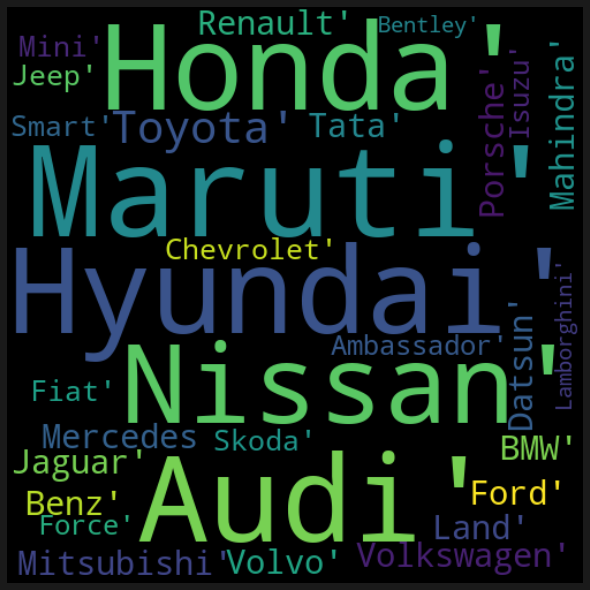

In [26]:
from wordcloud import WordCloud, STOPWORDS

text = train['Brand'].unique() 
wordcloud = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The WordCloud represents the mostly occurred Brands in the data viz. 

#### MARUTI, HYUNDAI, HONDA, AUDI

[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini')]

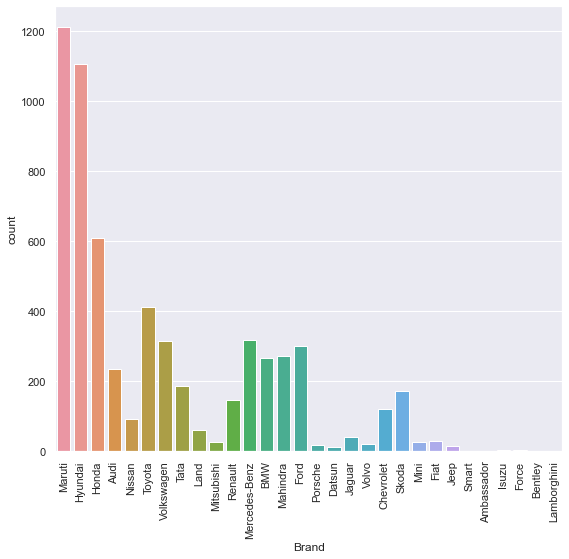

In [27]:
# BAR PLOT for different Brands

fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Brand', data=train)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)

## ii. "Location"

In [28]:
train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

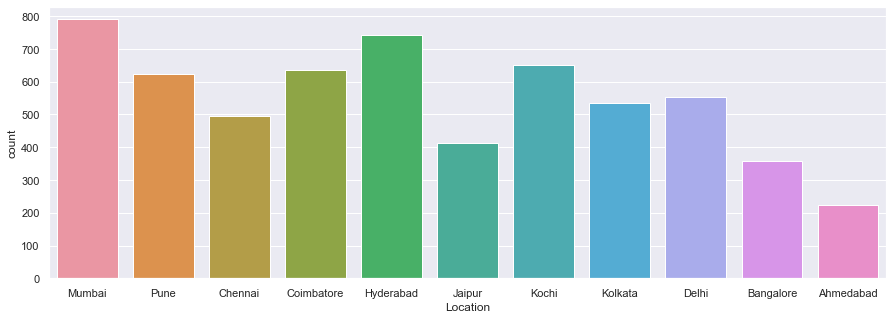

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='Location', data=train)

#### "Mumbai", "Hyderabad", "Kochi" are the places where maximum people prefer to have cars.

## iii. "Year"

In [30]:
train['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

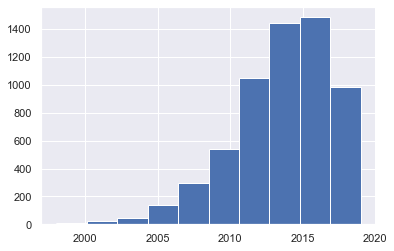

In [31]:
train["Year"].hist()

#### 2014, 2015, 2016 are the years where maximum cars were brought.

## iv.  "Fuel_Type"

In [32]:
train['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

[Text(0, 0, 'CNG'),
 Text(0, 0, 'Diesel'),
 Text(0, 0, 'Petrol'),
 Text(0, 0, 'LPG'),
 Text(0, 0, 'Electric')]

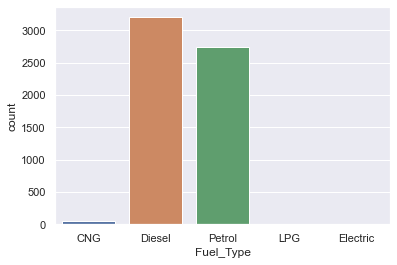

In [33]:
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=train)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)

#### Diesel and Petrol are the mostly brought cars.

## v. "Transmission"

In [34]:
train['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

[Text(0, 0, 'Manual'), Text(0, 0, 'Automatic')]

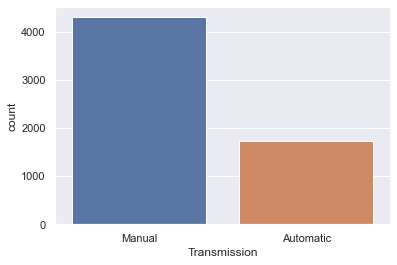

In [35]:
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Transmission', data=train)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)

#### "Manual" cars are the maximum bought cars.

## vi. "Owner_Type"

In [36]:
train['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

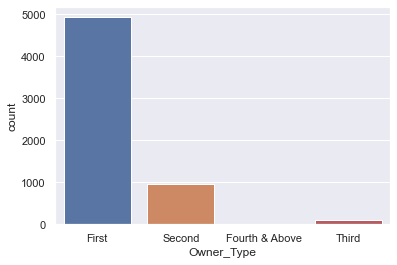

In [37]:
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()

#### Most people prefer to buy cars directly from the showroom. Very few people prefer Second Hand cars.

## vii. Seats

<ipython-input-38-8ca47765d7cd>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(2,2,4)


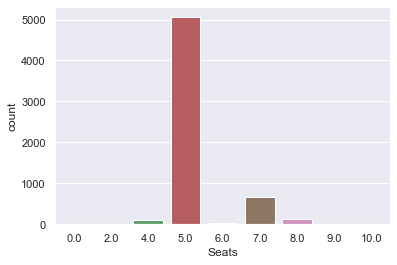

In [38]:
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Seats', data=train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()

#### "Five-seater" cars are mostly brought.

## viii. Price

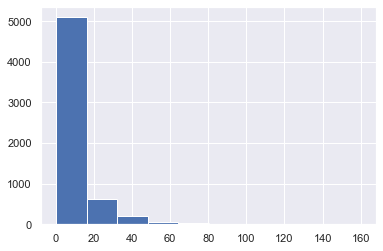

In [39]:
train["Price"].hist()

(array([ 169.,  697., 1706., 1683.,  718.,  475.,  370.,  160.,   38.,
           3.]),
 array([0.36464311, 0.83631924, 1.30799536, 1.77967149, 2.25134761,
        2.72302374, 3.19469986, 3.66637599, 4.13805211, 4.60972824,
        5.08140436]),
 <a list of 10 Patch objects>)

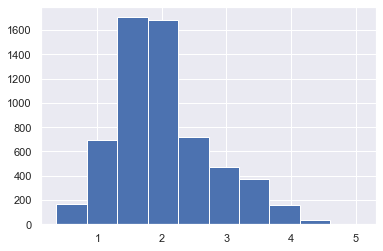

In [40]:
plt.hist(np.log1p(train["Price"]))

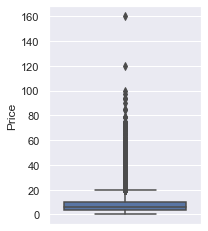

In [41]:
plt.subplot(1,2,2)
sns.boxplot(y=train['Price'])
plt.show()

# Relationship of Price with other Variables

In [42]:
# Important features relative to target Price
print("Important features relative to the target : Price")
corr = train.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Important features relative to the target : Price
Price                1.000000
Power                0.767331
Engine               0.657118
Year                 0.305327
Seats                0.052811
Kilometers_Driven   -0.011493
Id                  -0.020275
Years_driven        -0.305327
Mileage             -0.306588
Name: Price, dtype: float64


# Bivariate Analysis

### Price vs Brand

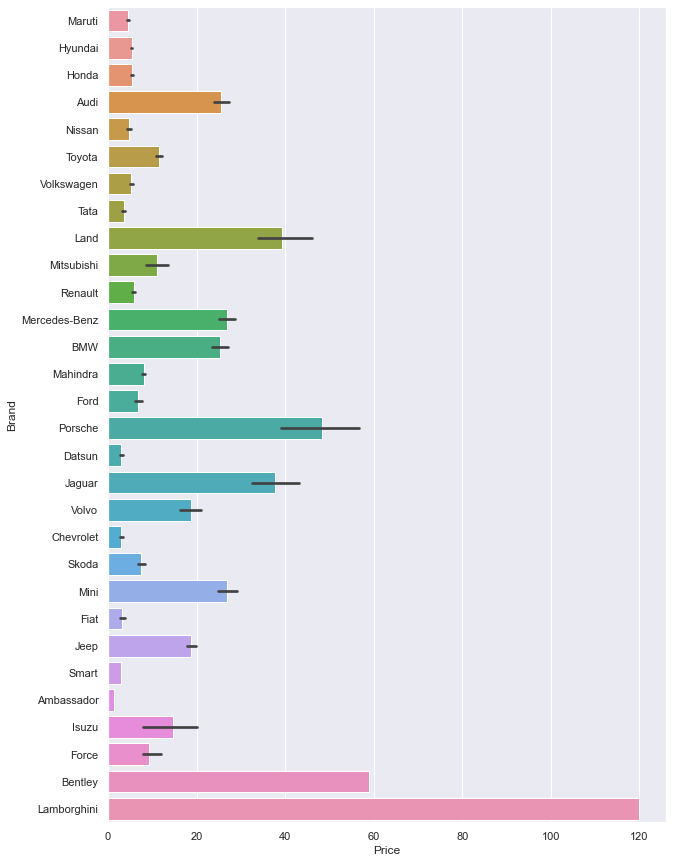

In [43]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y="Brand", x="Price", data=train)

### It is very clear that Brands like "Lamborghini", "Bentley", "Porsche" have higher price.

### Price vs Location

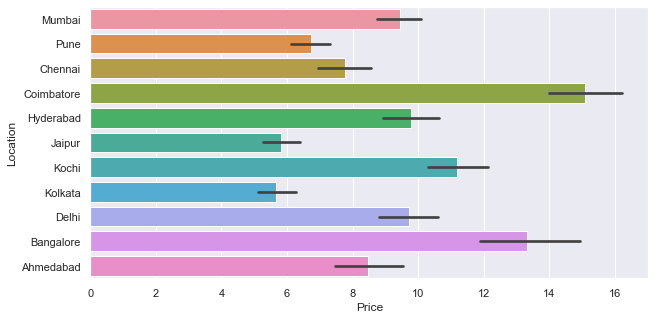

In [44]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y="Location", x="Price", data=train)

### Cars are priced really higher in places like Coimbatore, Bangalore, Mumbai, Kochi.

### Price vs Fuel Type

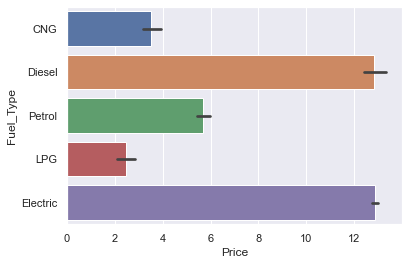

In [45]:
sns.barplot(y="Fuel_Type", x="Price", data=train)

### The price of Electric cars and Diesel cars are higher.

### Price vs Transmission

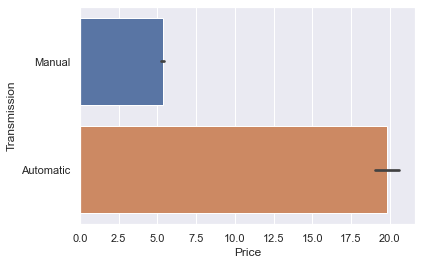

In [46]:
sns.barplot(y="Transmission", x="Price", data=train)

### Automatic cars are expensive as compared to that of Manual cars.

### Price vs Owner_Type

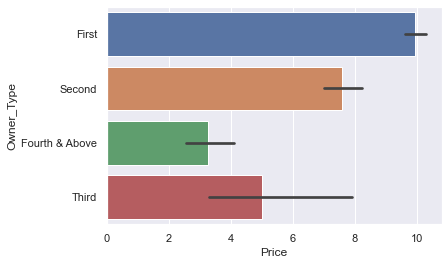

In [47]:
sns.barplot(y="Owner_Type", x="Price", data=train)

### Cars directly brought from showroom are obviously higher in price.

### Price vs Seats

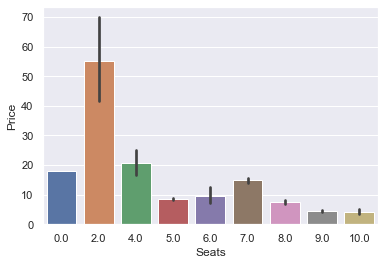

In [48]:
sns.barplot(x='Seats',y='Price',data=train)

###  Price of 2 seater cars are expensive than others.

### Scatter Plot

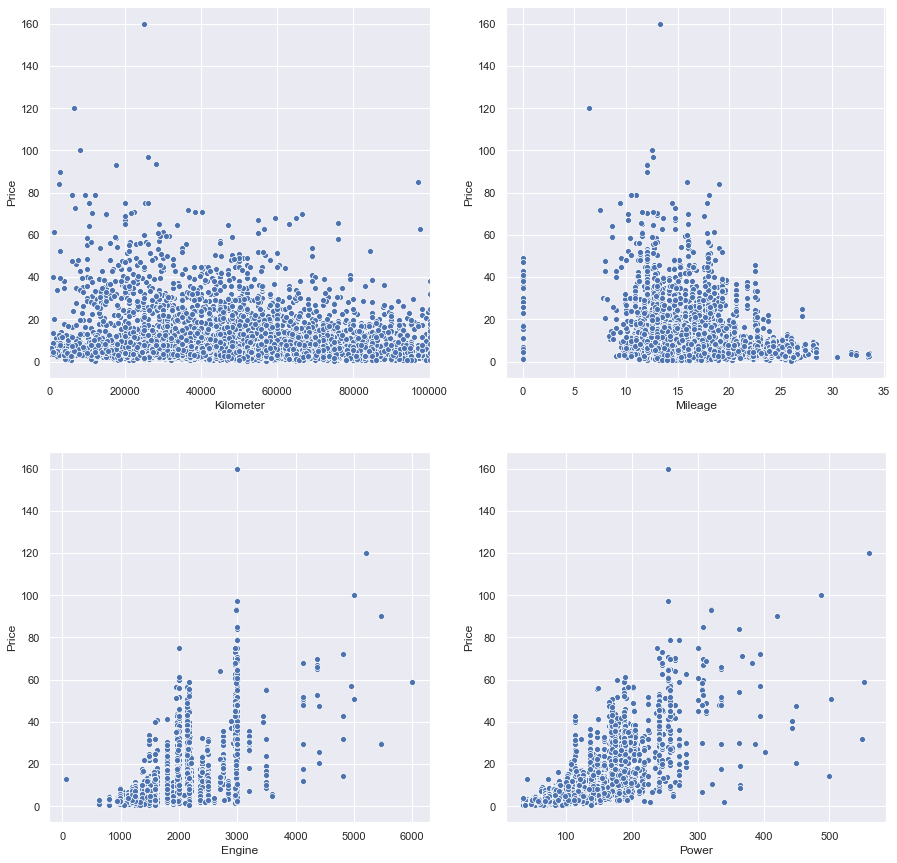

In [49]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
#plt.xlim([0, 100000])
p2 = sns.scatterplot(x="Mileage", y="Price", data=train)
loc, labels = plt.xticks()
ax2.set_xlabel('Mileage')

ax3 = fig.add_subplot(2,2,3)
#plt.xlim([0, 100000])
p3 = sns.scatterplot(x="Engine", y="Price", data=train)
loc, labels = plt.xticks()
ax3.set_xlabel('Engine')

ax4 = fig.add_subplot(2,2,4)
#plt.xlim([0, 100000])
p4 = sns.scatterplot(x="Power", y="Price", data=train)
loc, labels = plt.xticks()
ax4.set_xlabel('Power')

plt.show()

Text(0.5, 1.0, 'Year vs Price')

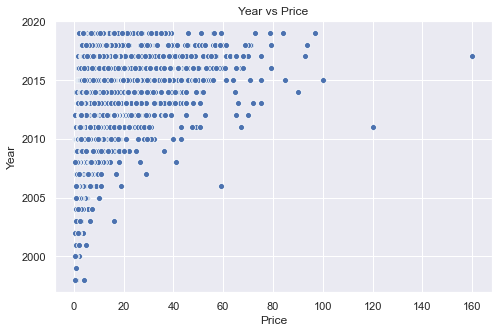

In [50]:
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(x='Price', y="Year", data=train)
ax1.set_xlabel('Price')
ax1.set_ylabel('Year')
ax1.set_title('Year vs Price')

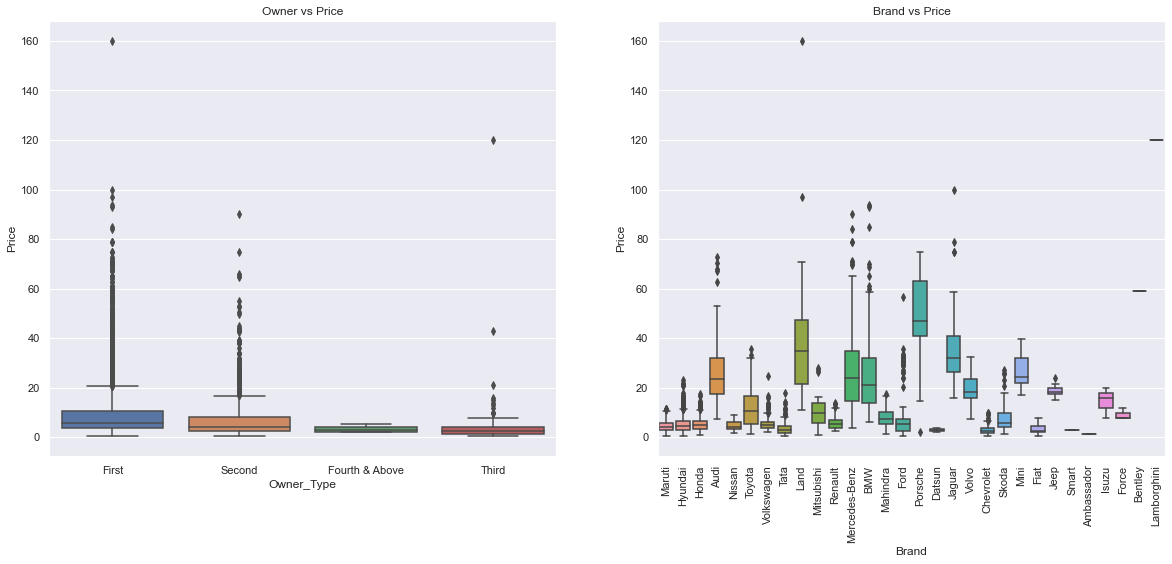

In [51]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Owner_Type', y='Price', data=train)
ax1.set_title('Owner vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Brand', y='Price', data=train)
loc,labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=90)
ax2.set_title('Brand vs Price')
plt.show()

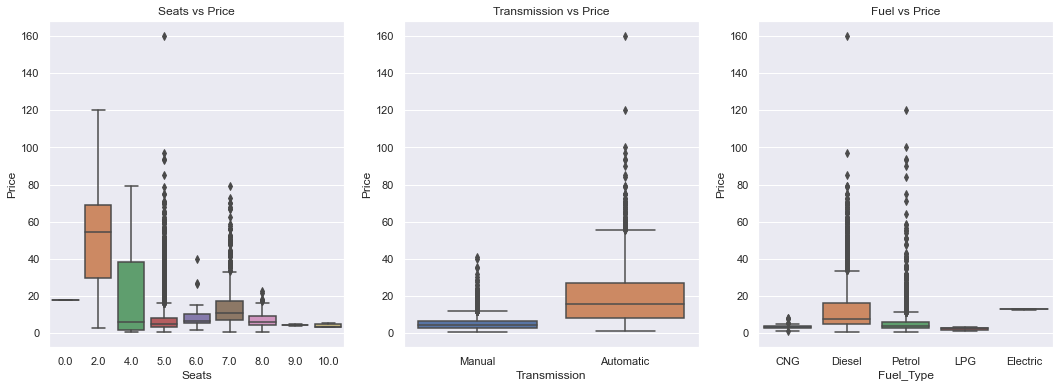

In [52]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y='Price', data=train)
ax1.set_title('Seats vs Price')

ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x='Transmission', y='Price', data=train)
ax2.set_title('Transmission vs Price')

ax3 = fig.add_subplot(1,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=train)
ax3.set_title('Fuel vs Price')

plt.show()

# V. Model Building 

## Label Encoding

In [53]:
# Owner_Type

# Train data
train.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

# Test data
test.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [54]:
# 'LOCATION',  'FUEL_TYPE',  'TRANSMISSION'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train["Location"] = le.fit_transform(train["Location"])
train["Location"] = train["Location"].astype("float")
test["Location"] = le.transform(test["Location"])
test["Location"] = test["Location"].astype("float")

train["Fuel_Type"] = le.fit_transform(train["Fuel_Type"])
train["Fuel_Type"] = train["Fuel_Type"].astype("float")
test["Fuel_Type"] = le.transform(test["Fuel_Type"])
test["Fuel_Type"] = test["Fuel_Type"].astype("float")

train["Transmission"] = le.fit_transform(train["Transmission"])
train["Transmission"] = train["Transmission"].astype("float")
test["Transmission"] = le.transform(test["Transmission"])
test["Transmission"] = test["Transmission"].astype("float")

### Dummy Variables 

In [55]:
dummy_train = pd.get_dummies(train[['Brand']], drop_first=True)
dummy_test = pd.get_dummies(test[['Brand']], drop_first=True)

In [56]:
train = pd.concat([train, dummy_train], axis=1)
test = pd.concat([test, dummy_test], axis=1)

In [57]:
train.columns

Index(['Id', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Years_driven', 'Brand', 'Model_name',
       'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Smart', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
       'Brand_Volvo'],
      dtype='object')

In [58]:
test.columns

Index(['Id', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Years_driven', 'Brand', 'Model_name', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Ford', 'Brand_Hindustan', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_OpelCorsa', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

# Drop Redundant variables

In [59]:
train.drop(['Id','Name','Year','Model_name','Brand','New_Price'], axis=1, inplace=True)
test.drop(['Id','Name','Year','Model_name','Brand','New_Price'], axis=1, inplace=True)

### Target variable : Treatment for Skewness and Kurtosis 

In [60]:
train['Price_log'] = np.log1p(train['Price'].values)
train.drop(columns=['Price'], axis=1, inplace=True)

In [61]:
# SEGREGATING X AND Y

x = train.drop(columns=['Price_log'], axis=1)
y = train[['Price_log']]

In [62]:
x = ((x) - x.mean())/x.std()
test = (test - test.mean())/test.std()

In [63]:
x.shape, test.shape

((6019, 39), (1234, 37))

In [64]:
x.columns, test.columns

(Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
        'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Years_driven',
        'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
        'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
        'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu', 'Brand_Jaguar',
        'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra',
        'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
        'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
        'Brand_Smart', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
        'Brand_Volvo'],
       dtype='object'),
 Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
        'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Years_driven',
        'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun',
        'Brand_Fiat', 'Brand_Ford', 'Brand_Hindustan', 'Brand_Honda',
    

In [65]:
x.drop(['Brand_Force','Brand_Smart'], axis=1, inplace=True)

In [66]:
x.shape, test.shape

((6019, 37), (1234, 37))

# Model Building

# Linear Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
reg = lm.fit(x_train, y_train)

In [69]:
y_predict_train = reg.predict(x_train)
y_predict_train

array([[2.07269361],
       [2.29104741],
       [0.6641338 ],
       ...,
       [1.08190778],
       [3.43870538],
       [1.57217958]])

In [70]:
y_predict_test = reg.predict(x_test)
y_predict_test

array([[4.15383037],
       [1.25325875],
       [2.03504922],
       ...,
       [1.97363957],
       [1.80292532],
       [1.84222856]])

In [71]:
from sklearn.metrics import r2_score

R_square_train = r2_score(y_predict_train, y_train)
print('R_square_train : ' , R_square_train)
R_square_test = r2_score(y_predict_test, y_test)
print('R_square_test : ' , R_square_test)

R_square_train :  0.9042768472580279
R_square_test :  0.8974049596319315


In [72]:
Reg_score_train = reg.score(x_train,y_train)
print('Reg_score_train : ' , Reg_score_train)
Reg_score_test = reg.score(x_test,y_test)
print('Reg_score_test : ' , Reg_score_test)

Reg_score_train :  0.9126392898585454
Reg_score_test :  0.9066692141802165


In [73]:
from sklearn.metrics import mean_squared_error

print ('MSE_train : ' + str(mean_squared_error(y_train,y_predict_train)) )
print ('MSE_test : ' + str(mean_squared_error(y_test,y_predict_test)) )

MSE_train : 0.04890299325456462
MSE_test : 0.05207048237999385


In [74]:
def mean_absolute_percentage_error(y_train, y_predict_train): 
    
    return np.mean(np.abs((y_train - y_predict_train) / y_train)) * 100

mean_absolute_percentage_error(y_train, y_predict_train)

Price_log    9.636611
dtype: float64

In [75]:
print("Accuracy on Traing set: ",lm.score(x_train,y_train))
print("Accuracy on Testing set: ",lm.score(x_test,y_test))

Accuracy on Traing set:  0.9126392898585454
Accuracy on Testing set:  0.9066692141802165


In [76]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_predict_test))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_predict_test))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_predict_test)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_predict_test))

		Error Table
Mean Absolute Error      :  0.15717680817868637
Mean Squared  Error      :  0.05207048237999385
Root Mean Squared  Error :  0.22818957552875602
R Squared Error          :  0.9066692141802165


# Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(x_train, y_train)
y_pred= RF_reg.predict(x_test)
print("Accuracy on Traing set: ",RF_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",RF_reg.score(x_test,y_test))

<ipython-input-77-07c6562f3f8d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_reg.fit(x_train, y_train)


Accuracy on Traing set:  0.9910528165656669
Accuracy on Testing set:  0.9423706904158905


In [78]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.12684144194928634
Mean Squared  Error      :  0.032152155614171465
Root Mean Squared  Error :  0.1793102217224982
R Squared Error          :  0.9423706904158905


In [79]:
df=x_train.columns

Text(0.5, 0, 'Relative Importance')

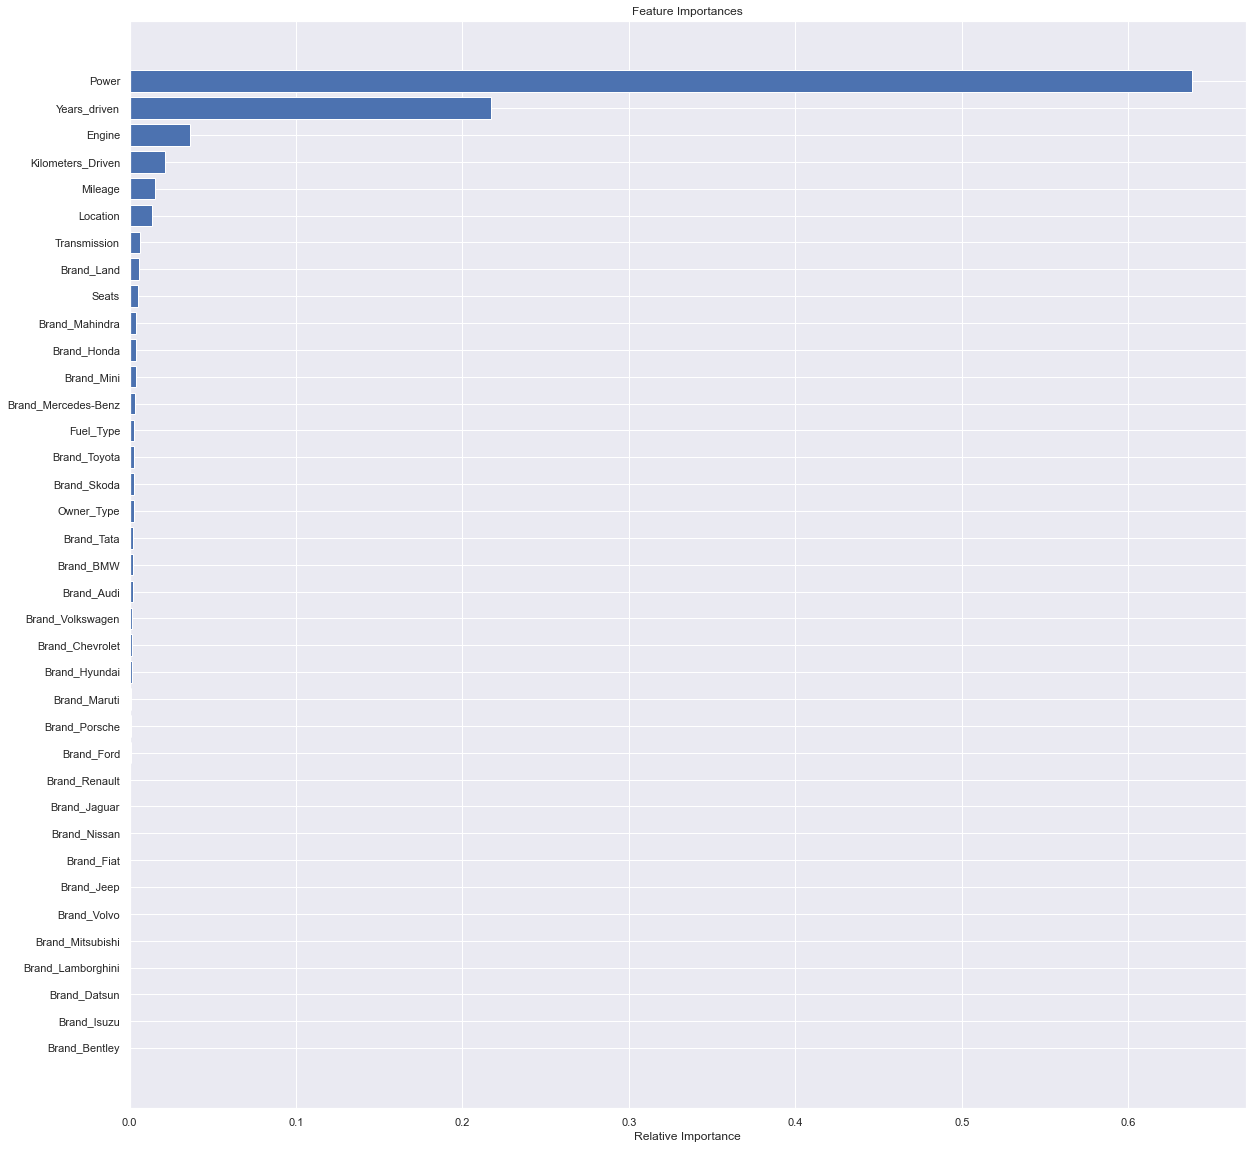

In [80]:
features=df
importances = RF_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Application of the model on Test data 

Random Forest was chosen for the final predictions the errors are less when in comparison with the Linear Regression model. The variance of 5% (difference in Train and Test accuracy) was also considerable and we can say that there is no Overfitting. Moreover, the model also captures the non-linearity in the data.

In [81]:
test_predict = RF_reg.predict(test)
test_predict

array([1.42546155, 1.30519668, 2.95991527, ..., 1.37550884, 1.64295434,
       2.88739231])

In [82]:
# convert array into dataframe 
test_predict = pd.DataFrame(test_predict)

In [83]:
test_predict.to_csv("C:\\Users\\Roma\\Downloads\\Retail & Ecommerce Analytics\\RF_Predictions.csv")